In [358]:
pip install scipy --upgrade


Requirement already up-to-date: scipy in c:\users\gaura\appdata\local\continuum\anaconda3\lib\site-packages (1.3.3)
Note: you may need to restart the kernel to use updated packages.


In [1]:
from scipy import stats
from scipy.stats import skew,norm 
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.patches import Rectangle
sns.set()
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

#ML Algoirthm
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
import sklearn.linear_model as linear_model
from sklearn.svm import SVR
#from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
#from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
import xgboost


In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
train_size = train.shape[0]
import warnings
warnings.filterwarnings(action="ignore")
train_size

1460

# Data Exploratory Analysis

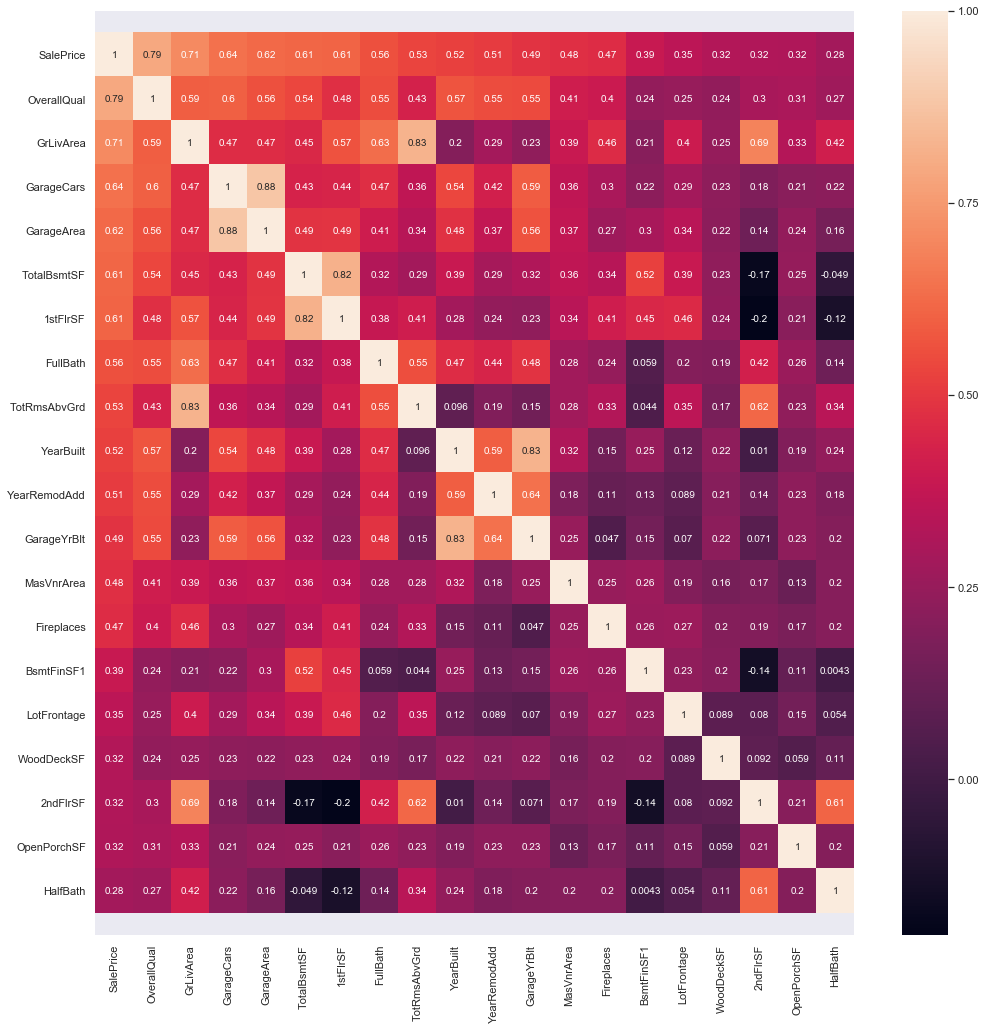

In [3]:
#Pranidhi
# Correlation of top 10 feature with saleprice
corWithSalePrice = train.corr().nlargest(20,'SalePrice')['SalePrice'].index
f , ax = plt.subplots(figsize = (17,17))
ax = sns.heatmap(train[corWithSalePrice].corr(), annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

traincorr = train.corr()

In [4]:
#Pranidhi
# Correlation across all features
traincorr.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


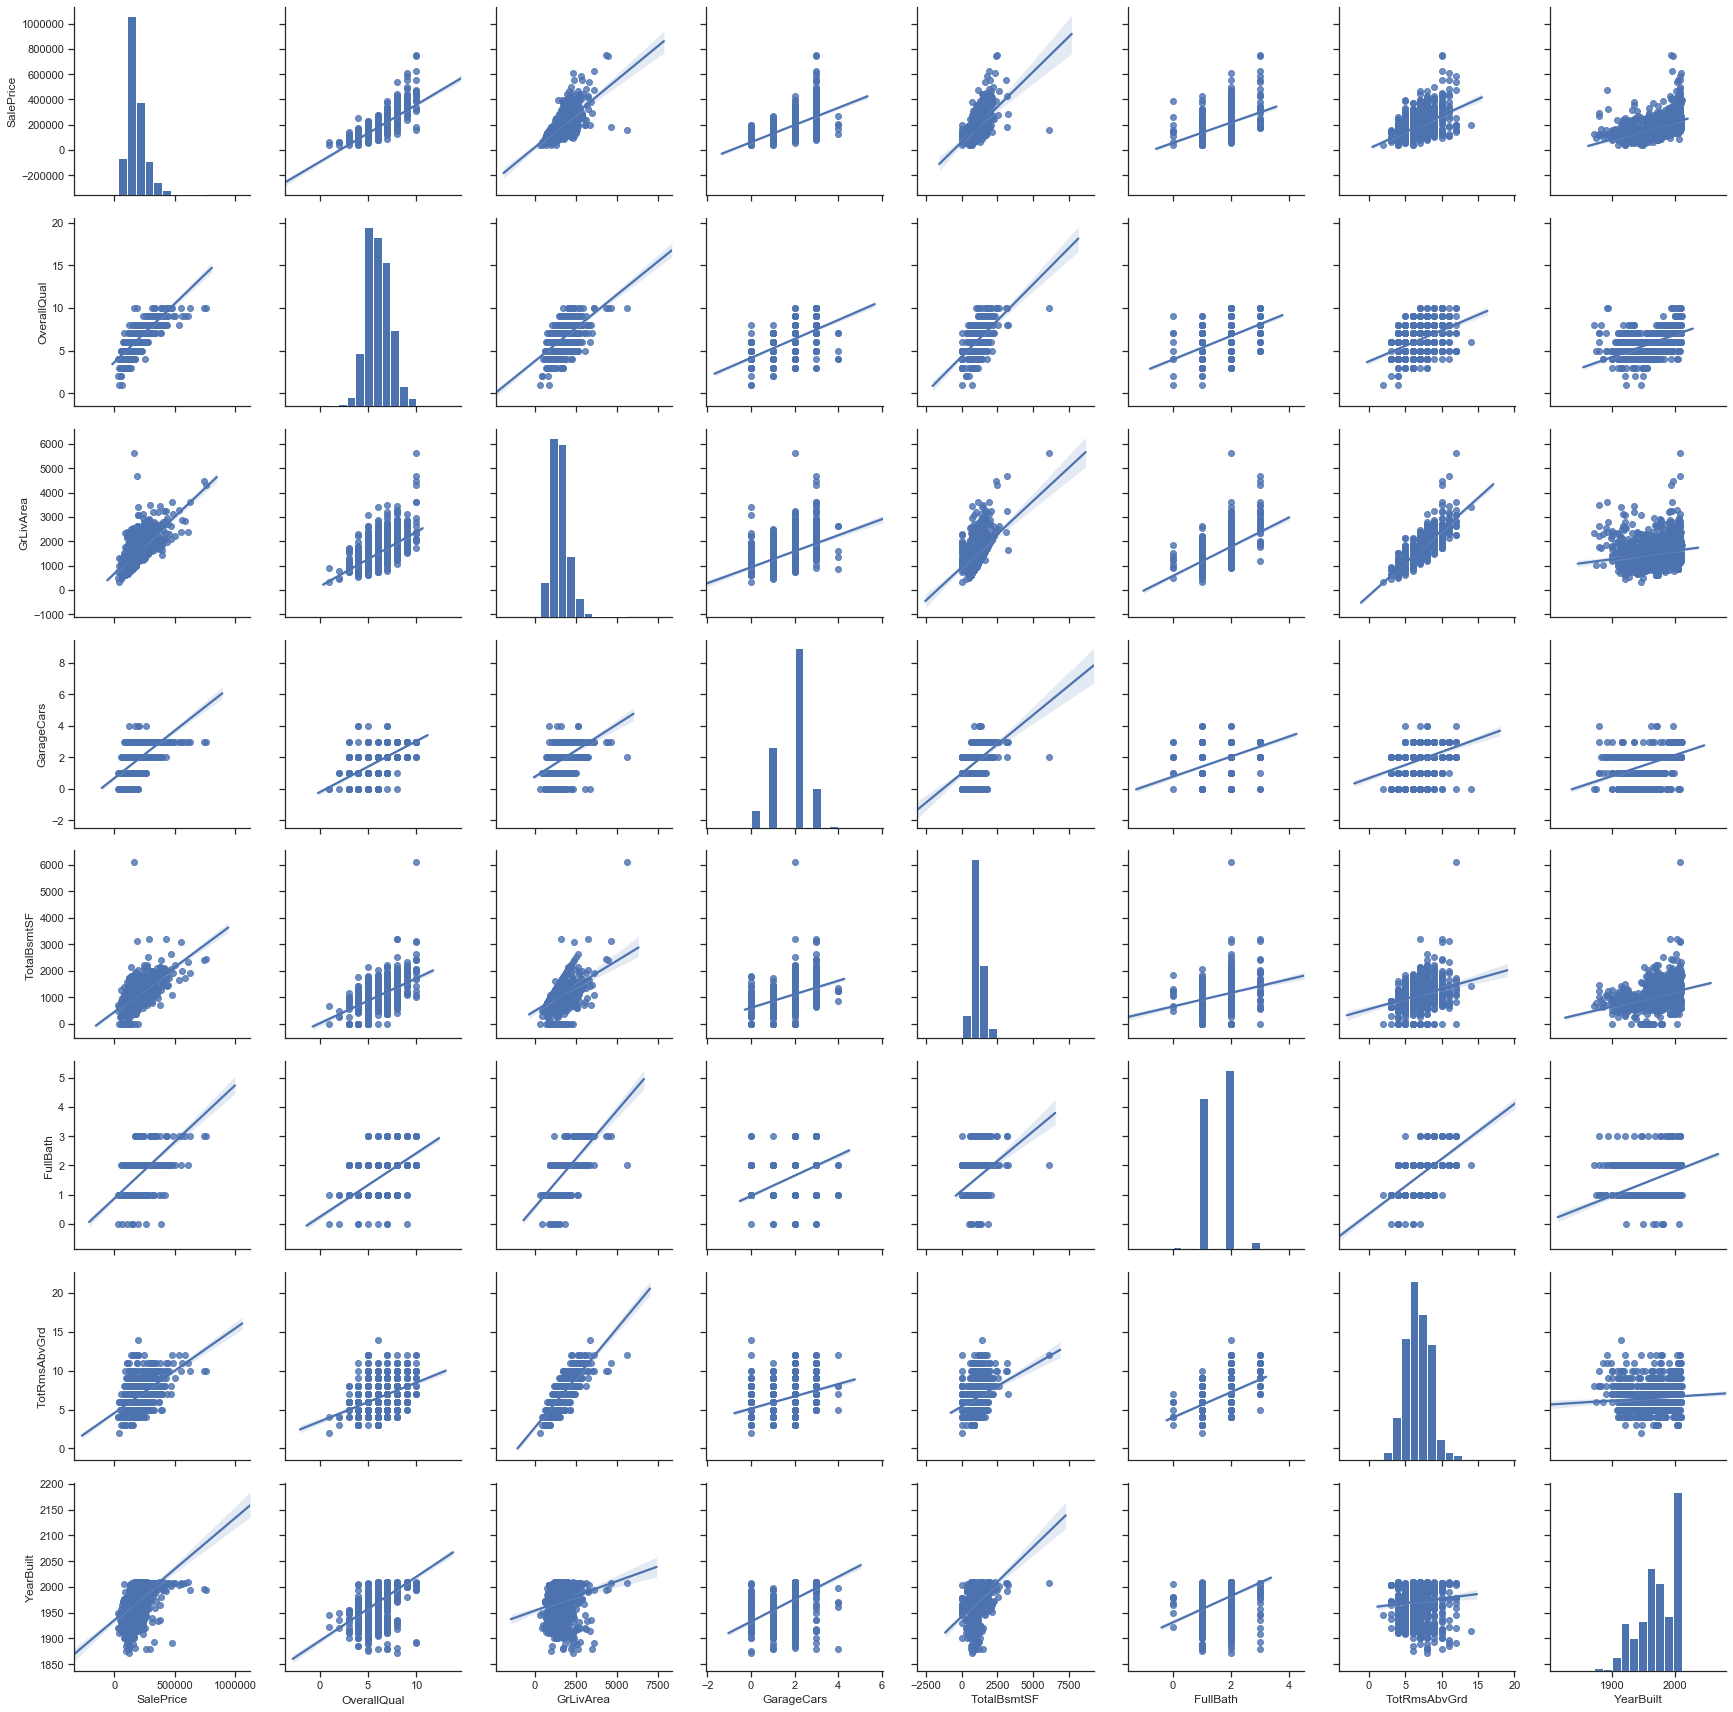

In [5]:
# Pranidhi
# Pair plotting the features
col = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt']
sns.set(style='ticks')
sns.pairplot(train[col], height=3, kind='reg')

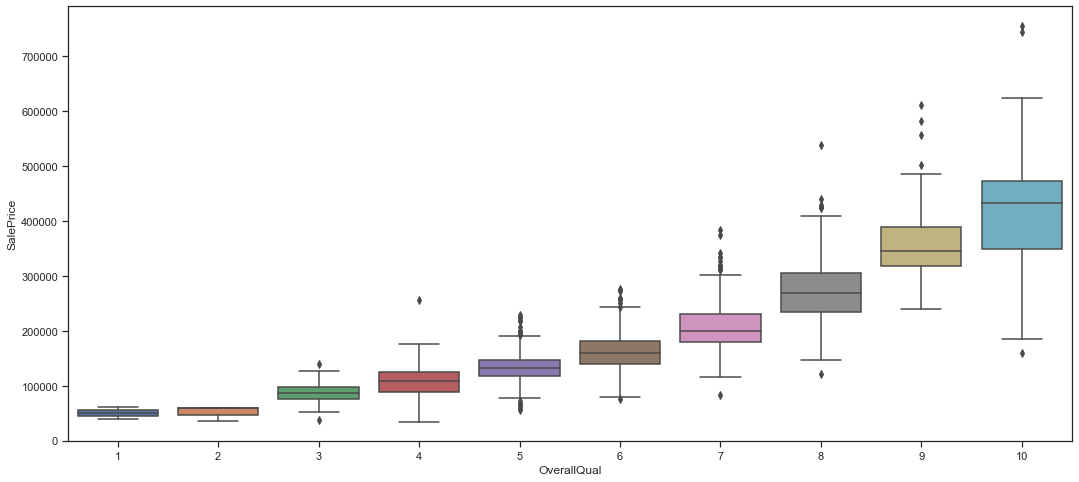

In [6]:
#Pranidhi
#boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(x=train.OverallQual, y=train.SalePrice)

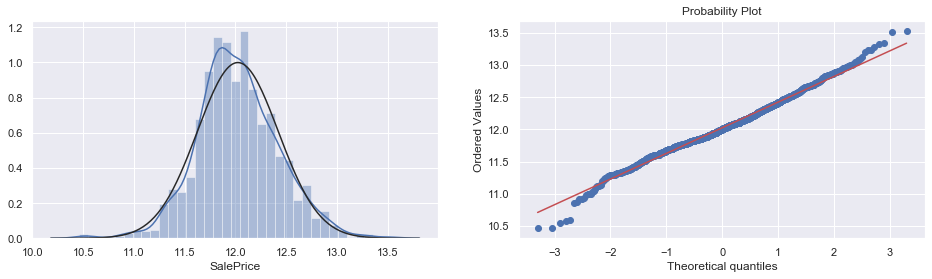

Skewness of log saleprice0.12134661989685333
skewness of sales price: 1.8828757597682129
Kurtosis: 0.809519155707878
Kurtosis: 0.809519155707878


In [79]:
#Log - transformation
y = np.log1p(train['SalePrice'])

f,ax = plt.subplots(1,2,figsize=(16,4))
sns.distplot(y,fit=norm,ax=ax[0])
stats.probplot(y,plot=plt)
plt.show()

#skewness and kurtosis
print("Skewness of log saleprice{}".format(y.skew()))
print("skewness of sales price: {}".format(train['SalePrice'].skew()))
print("Kurtosis: {}".format(y.kurt()))
print("Kurtosis: {}".format(y.kurt()))


In [80]:
def remove_overfit_features(df,weight):
    overfit = []
    for i in df.columns:
        counts = df[i].value_counts()
        zeros = counts.iloc[0]
        if zeros / len(df) * 100 > weight:
            overfit.append(i)
    overfit = list(overfit)
    return overfit


overfitted_features = remove_overfit_features(train,99)
print(overfitted_features)

#train.drop(overfitted_features,inplace=True,axis=1)
#test.drop(overfitted_features,inplace=True,axis=1)
print(train.shape)
print(test.shape)

['Street', 'Utilities', 'PoolArea']
(1460, 81)
(1459, 80)


In [81]:
train.drop(['Street','Utilities'],inplace=True,axis=1)
test.drop(['Street','Utilities'],inplace=True,axis=1)


In [82]:
print(train.shape)
print(test.shape)

(1460, 79)
(1459, 78)


In [83]:
train_labels = y
train_features = train.drop(['SalePrice'], axis=1)
test_features = test

# Combine train and test features in order to apply the feature transformation pipeline to the entire dataset
all_features = pd.concat([train_features, test_features]).reset_index(drop=True)
print(all_features.shape)
train_labels

(2919, 78)


0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [84]:
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [85]:
all_features.drop('Id',inplace=True,axis=1)
all_features.shape

(2919, 77)

# Impute the missing values

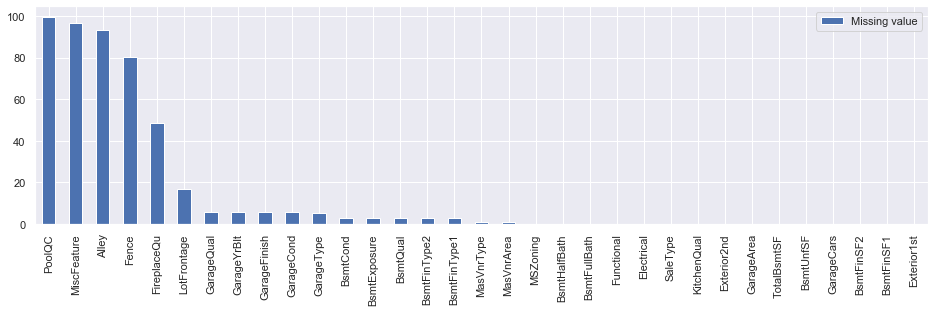

In [86]:
#visualize missing data
missing_value = all_features.isnull().sum().sort_values(ascending=False) / len(all_features) * 100
missing_value = missing_value[missing_value != 0]
missing_value = pd.DataFrame({'Missing value' :missing_value,'Type':missing_value.index.map(lambda x:all_features[x].dtype)})
missing_value.plot(kind='bar',figsize=(16,4))
plt.show()

In [87]:
print("Total No. of missing value {} before Imputation".format(sum(all_features.isnull().sum())))
def fill_missing_values():
 
    fillSaleType = all_features[all_features['SaleCondition'] == 'Normal']['SaleType'].mode()[0]
    all_features['SaleType'].fillna(fillSaleType,inplace=True)

    fillElectrical = all_features[all_features['Neighborhood']=='Timber']['Electrical'].mode()[0]
    all_features['Electrical'].fillna(fillElectrical,inplace=True)

    exterior1_neighbor = all_features[all_features['Exterior1st'].isnull()]['Neighborhood'].values[0]
    fillExterior1 = all_features[all_features['Neighborhood'] == exterior1_neighbor]['Exterior1st'].mode()[0]
    all_features['Exterior1st'].fillna(fillExterior1,inplace=True)
    print(all_features.shape)
    exterior2_neighbor = all_features[all_features['Exterior2nd'].isnull()]['Neighborhood'].values[0]
    fillExterior2 = all_features[all_features['Neighborhood'] == exterior1_neighbor]['Exterior1st'].mode()[0]
    all_features['Exterior2nd'].fillna(fillExterior2,inplace=True)
    
    bsmtNeigh = all_features[all_features['BsmtFinSF1'].isnull()]['Neighborhood'].values[0]
    fillBsmtFinSf1 = all_features[all_features['Neighborhood'] == bsmtNeigh]['BsmtFinSF1'].mode()[0]
    all_features['BsmtFinSF1'].fillna(fillBsmtFinSf1,inplace=True)
    print(all_features.shape)
    kitchen_grade = all_features[all_features['KitchenQual'].isnull()]['KitchenAbvGr'].values[0]
    fillKitchenQual = all_features[all_features['KitchenAbvGr'] == kitchen_grade]['KitchenQual'].mode()[0]
    all_features['KitchenQual'].fillna(fillKitchenQual,inplace=True)
        
    all_features['MSZoning'] = all_features.groupby('MSSubClass')['MSZoning'].transform(lambda x: x.fillna(x.mode()[0]))
    print(all_features.shape)   
    all_features['LotFrontage'] = all_features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    
    for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond','BsmtQual', 'BsmtCond', 'BsmtExposure',
                'BsmtFinType1', 'BsmtFinType2','PoolQC']:
        all_features[col] = all_features[col].fillna('None')
    
    categorical_cols =  all_features.select_dtypes(include='object').columns
    all_features[categorical_cols] = all_features[categorical_cols].fillna('None')
    
    numeric_cols = all_features.select_dtypes(include='number').columns
    all_features[numeric_cols] = all_features[numeric_cols].fillna(0)
    
    #all_features['Shed'] = np.where(all_features['MiscFeature']=='Shed', 1, 0)
    all_features['Shed_Area'] = all_features['MiscVal']
    #GarageYrBlt -  missing values there for the building which has no Garage, imputing 0 makes huge difference with other buildings,
    #imputing mean doesn't make sense since there is no Garage. So we'll drop it
    all_features.drop(['GarageYrBlt','MiscFeature','MiscVal','MSSubClass'],inplace=True,axis=1)
    print(all_features.shape)
   # all_features['QualitySF'] = all_features['GrLivArea'] * all_features['OverallQual']

fill_missing_values()

print("Total No. of missing value {} after Imputation".format(sum(all_features.isnull().sum())))

Total No. of missing value 13963 before Imputation
(2919, 77)
(2919, 77)
(2919, 77)
(2919, 74)
Total No. of missing value 0 after Imputation


In [88]:
all_features = all_features.drop(['PoolQC',], axis=1)
all_features = all_features.drop(['MoSold',], axis=1)
#all_features = all_features.drop(['YrSold',], axis=1)
all_features = all_features.drop(['BsmtFinSF2',], axis=1)


all_features = all_features.drop(['BsmtUnfSF',], axis=1)
all_features = all_features.drop(['BsmtFinSF1',], axis=1)
all_features = all_features.drop(['GarageCars',], axis=1)



# Fix skewed features

In [89]:
#converting some numeric features to string
#all_features['MSSubClass'] = all_features['MSSubClass'].apply(str)
#all_features['YrSold'] = all_features['YrSold'].astype(str)
#all_features['MoSold'] = all_features['MoSold'].astype(str)


# Filter the skewed features
numeric = all_features.select_dtypes(include='number').columns
skew_features = all_features[numeric].apply(lambda x: skew(x)).sort_values(ascending=False)

high_skew = skew_features[skew_features > 0.5]
high_skew1 = skew_features[skew_features <- 0.5]

skew_index = high_skew.index,high_skew1.index

print("There are {} numerical features with Skew > 0.5 :".format(high_skew.shape[0]))
skewness = pd.DataFrame({'Skew' :high_skew})
skewness.to_csv("skewness.csv")
print(skewness)


There are 22 numerical features with Skew > 0.5 :
                    Skew
Shed_Area      21.947195
PoolArea       16.898328
LotArea        12.822431
LowQualFinSF   12.088761
3SsnPorch      11.376065
KitchenAbvGr    4.302254
EnclosedPorch   4.003891
ScreenPorch     3.946694
BsmtHalfBath    3.931594
MasVnrArea      2.613592
OpenPorchSF     2.535114
WoodDeckSF      1.842433
LotFrontage     1.505704
1stFlrSF        1.469604
GrLivArea       1.269358
TotalBsmtSF     1.156894
2ndFlrSF        0.861675
TotRmsAbvGrd    0.758367
Fireplaces      0.733495
HalfBath        0.694566
BsmtFullBath    0.624832
OverallCond     0.570312


In [90]:
def corr(df):
    df=df.corr(method ='pearson')
    return df

df=corr(train)
df

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [91]:
len(all_features.columns)

68

In [92]:
#all_features['YearsSinceRemodel'] = all_features['YrSold'].astype(int) - all_features['YearRemodAdd'].astype(int)
all_features['Total_Home_Quality'] = all_features['OverallQual'] + all_features['OverallCond']
all_features = all_features.drop(['OverallQual',], axis=1)
all_features = all_features.drop(['OverallCond',], axis=1)


all_features['TotalSF'] = all_features['GrLivArea'] + all_features['1stFlrSF'] + all_features['2ndFlrSF']
all_features = all_features.drop(['GrLivArea',], axis=1)
all_features = all_features.drop(['1stFlrSF',], axis=1)
all_features = all_features.drop(['2ndFlrSF',], axis=1)


#all_features['YrBltAndRemod'] = all_features['YearBuilt'] + all_features['YearRemodAdd']
#all_features['BsmtFinType1_Unf'] = 1*(all_features['BsmtFinType1'] == 'Unf')
#all_features['Total_sqr_footage'] = (all_features['BsmtFinSF1'] + all_features['BsmtFinSF2'] +
 #                                all_features['1stFlrSF'] + all_features['2ndFlrSF'])
all_features['Total_Bathrooms'] = (all_features['FullBath'] + (0.5 * all_features['HalfBath']) +
                               all_features['BsmtFullBath'] + (0.5 * all_features['BsmtHalfBath']))
all_features = all_features.drop(['FullBath',], axis=1)
all_features = all_features.drop(['HalfBath',], axis=1)
all_features = all_features.drop(['BsmtFullBath',], axis=1)
all_features = all_features.drop(['BsmtHalfBath',], axis=1)





all_features['Total_porch_sf'] = (all_features['OpenPorchSF'] + all_features['3SsnPorch'] +
                              all_features['EnclosedPorch'] + all_features['ScreenPorch'] +
                              all_features['WoodDeckSF'])
all_features = all_features.drop(['OpenPorchSF',], axis=1)
all_features = all_features.drop(['3SsnPorch',], axis=1)
all_features = all_features.drop(['EnclosedPorch',], axis=1)
all_features = all_features.drop(['ScreenPorch',], axis=1)
all_features = all_features.drop(['WoodDeckSF',], axis=1)


all_features['TotalBsmtSF'] = all_features['TotalBsmtSF'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
#all_features['2ndFlrSF'] = all_features['2ndFlrSF'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
all_features['GarageArea'] = all_features['GarageArea'].apply(lambda x: np.exp(6) if x <= 0.0 else x)
#all_features['BsmtFinSF1'] = all_features['BsmtFinSF1'].apply(lambda x: np.exp(6.5) if x <= 0.0 else x)
print(all_features.shape)

(2919, 58)


In [93]:
def logs(columns):
    for col in columns:
        all_features[col+"_log"] = np.log(1.01+all_features[col]) 
        print(all_features.shape)

log_features = ['Shed_Area','PoolArea','LotFrontage','LotArea','MasVnrArea',
                 'TotalBsmtSF','Total_porch_sf',
                 'TotalSF','GarageArea']

logs(log_features)
all_features = all_features.drop(['LotFrontage'], axis=1)
all_features = all_features.drop(['LotArea'], axis=1)
all_features = all_features.drop(['MasVnrArea'], axis=1)
all_features = all_features.drop(['TotalBsmtSF'], axis=1)
all_features = all_features.drop(['Total_porch_sf'], axis=1)
all_features = all_features.drop(['TotalSF'], axis=1)
all_features = all_features.drop(['Shed_Area'], axis=1)
all_features = all_features.drop(['PoolArea'], axis=1)
all_features = all_features.drop(['GarageArea'], axis=1)
#all_features = all_features.drop(['LowQualFinSF'], axis=1)
#all_features = all_features.drop(['KitchenAbvGr'], axis=1)
#all_features = all_features.drop(['TotRmsAbvGrd'], axis=1)
#all_features = all_features.drop(['Fireplaces'], axis=1)




(2919, 59)
(2919, 60)
(2919, 61)
(2919, 62)
(2919, 63)
(2919, 64)
(2919, 65)
(2919, 66)
(2919, 67)


In [94]:
def squares(columns):
    for col in columns:
        all_features[col+"_sq"] =  all_features[col] * all_features[col]
        print(all_features.shape)

squared_features = ['LotFrontage_log' ]

squares(squared_features)
all_features = all_features.drop(['LotFrontage_log'], axis=1)
print(all_features.shape)


(2919, 59)
(2919, 58)


In [95]:
quality_map = {'None':0,'Po':1,'Fa':2,'TA':3,'Gd':4,'Ex':5}
quality_cols = ['BsmtQual', 'BsmtCond','ExterQual', 'ExterCond','FireplaceQu','GarageQual', 'GarageCond','KitchenQual','HeatingQC']
for col in quality_cols:
    all_features[col] = all_features[col].replace(quality_map)

all_features['BsmtExposure'] = all_features['BsmtExposure'].replace({"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3})

all_features["PavedDrive"] =all_features["PavedDrive"].replace({"N" : 0, "P" : 1, "Y" : 2})

bsmt_ratings = {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, "ALQ" : 5, "GLQ" : 6}
bsmt_col = ['BsmtFinType1','BsmtFinType2']
for col in bsmt_col:
    all_features[col] = all_features[col].replace(bsmt_ratings)

    
all_features["GarageScore"]    = all_features["GarageQual"] * all_features["GarageCond"]
all_features["ExterScore"]     = all_features["ExterQual"] * all_features["ExterCond"]
print(all_features.shape)

(2919, 60)


In [97]:
all_features=pd.get_dummies(all_features, columns=['HeatingQC','BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','FireplaceQu',
              'PavedDrive','Total_Home_Quality','Total_Bathrooms'])


In [98]:
all_features = all_features.drop(['BsmtFinType1'], axis=1)
all_features = all_features.drop(['BsmtFinType2'], axis=1)
all_features = all_features.drop(['BsmtQual'], axis=1)
all_features = all_features.drop(['ExterCond'], axis=1)
all_features = all_features.drop(['GarageQual'], axis=1)
all_features = all_features.drop(['GarageCond'], axis=1)
all_features = all_features.drop(['ExterQual'], axis=1)

In [380]:
def corr(df):
    df=df.corr(method ='pearson')
    return df

df=corr(all_features)
df.to_csv("corr.csv")

In [381]:
def get_corr_pairs(mat):
    aDict = {}
    for i, j in mat.iterrows(): 
        for items in j.iteritems(): 
            if(items[1]>=0.7 and items[0]!=i):
                aDict.setdefault(i,[]).append(items[0])
            
    return aDict
print(get_corr_pairs(df))

{'KitchenAbvGr': ['BldgType_Duplex'], 'TotRmsAbvGrd': ['TotalSF_log'], 'Fireplaces': ['FireplaceQu'], 'FireplaceQu': ['Fireplaces'], 'MasVnrArea_log': ['MasVnrType_BrkFace'], 'TotalSF_log': ['TotRmsAbvGrd'], 'MSZoning_FV': ['Neighborhood_Somerst'], 'Neighborhood_NPkVill': ['Exterior2nd_Brk Cmn'], 'Neighborhood_Somerst': ['MSZoning_FV'], 'BldgType_Duplex': ['KitchenAbvGr'], 'RoofStyle_Flat': ['RoofMatl_Tar&Grv'], 'RoofMatl_Tar&Grv': ['RoofStyle_Flat'], 'Exterior1st_AsbShng': ['Exterior2nd_AsbShng'], 'Exterior1st_AsphShn': ['Exterior2nd_AsphShn'], 'Exterior1st_CemntBd': ['Exterior2nd_CmentBd'], 'Exterior1st_HdBoard': ['Exterior2nd_HdBoard'], 'Exterior1st_MetalSd': ['Exterior2nd_MetalSd'], 'Exterior1st_Plywood': ['Exterior2nd_Plywood'], 'Exterior1st_Stucco': ['Exterior2nd_Stucco'], 'Exterior1st_VinylSd': ['Exterior2nd_VinylSd'], 'Exterior1st_Wd Sdng': ['Exterior2nd_Wd Sdng'], 'Exterior2nd_AsbShng': ['Exterior1st_AsbShng'], 'Exterior2nd_AsphShn': ['Exterior1st_AsphShn'], 'Exterior2nd_Brk C

In [136]:
all_features = pd.read_csv("new.csv")

In [137]:
X = all_features.iloc[:len(train_labels), :]
X_test = all_features.iloc[len(train_labels):, :]

In [138]:
train_labels

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
          ...    
1455    12.072547
1456    12.254868
1457    12.493133
1458    11.864469
1459    11.901590
Name: SalePrice, Length: 1460, dtype: float64

In [139]:
overfitted_features = remove_overfit_features(X,99)
overfitted_features
X = X.drop(overfitted_features, axis=1) 
X_test = X_test.drop(overfitted_features, axis=1)
X.shape
XL =X

In [140]:
# Define error metrics
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, train_labels, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [141]:
X.shape

(1460, 159)

In [142]:
#Pranidhi
actual = pd.read_csv("test_actual_price.csv")

In [144]:
#Pranidhi
# Applying the XGBoost Model

xgb = xgboost.XGBRegressor(colsample_bytree=0.8, subsample=0.5,
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.8, n_estimators=2000,
                             reg_alpha=0.1, reg_lambda=0.3, gamma=0.01, 
                             silent=1, random_state =7, nthread = -1)


xgb.fit(X, train_labels)
xgb_pred = xgb.predict(X_test)
predict = xgb.predict(X_test)

In [145]:
#Pranidhi
print(predict)

[11.727476  11.9868    12.125429  ... 11.9524765 11.888487  11.617895 ]


In [147]:
#Pranidhi
#changing the predicted values from log to integer values
X_test['Predict'] = np.expm1(predict)
X_test.index.name = 'Id' 
X_test.head()

,LowQualFinSF,Shed_Area_log,LotArea_log,MasVnrArea_log,TotalBsmtSF_log,Total_porch_sf_log,TotalSF_log,GarageArea_log,LotFrontage_log_sq,MSZoning_FV,...,ExterScore_9,ExterScore_12,ExterScore_15,ExterScore_16,YrSold_2006,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,Predict
Id,,,,,,,,,,,,,,,,,,,,,
1460,0,0.009950,9.360742,0.009950,6.783337,5.564559,7.491651,6.594427,19.312268,0,...,1,0,0,0,0,0,0,0,1,123929.492188
1461,0,9.433565,9.565775,4.691440,7.192942,6.063808,7.885709,5.746235,19.420249,0,...,1,0,0,0,0,0,0,0,1,160619.578125
1462,0,0.009950,9.534668,0.009950,6.834120,5.509429,8.089179,6.180037,18.641855,0,...,1,0,0,0,0,0,0,0,1,184503.500000
1463,0,0.009950,9.208239,3.044999,6.831964,5.983961,8.073718,6.154879,19.093181,0,...,1,0,0,0,0,0,0,0,1,191396.281250
1464,0,0.009950,8.518394,0.009950,7.155404,5.424994,7.848157,6.228531,14.321811,0,...,0,1,0,0,0,0,0,0,1,179468.609375


In [ ]:
#Pranidhi
submission = final[['Id','Predict']]
submission.to_csv('Predict_houses.csv')

In [148]:
#Pranidhi
final = pd.merge(X_test, actual, on = "Id", how='inner')

In [149]:
#Pranidhi
final = final.dropna()
final['error'] = final['Predict']-final['SalePrice'].astype(float)
final['error%'] = (final['error']/final['SalePrice'].astype(float))*100


In [150]:
#Pranidhi
predict=final['Predict'].values
actual=final['SalePrice'].values

In [151]:
#Pranidhi
actual


array([105000, 172000, 189900, ..., 131000, 132000, 188000], dtype=int64)

In [152]:
#Pranidhi
ferror=np.mean(np.abs(((actual-predict)/actual )*100))
ferror

29.028834093558235

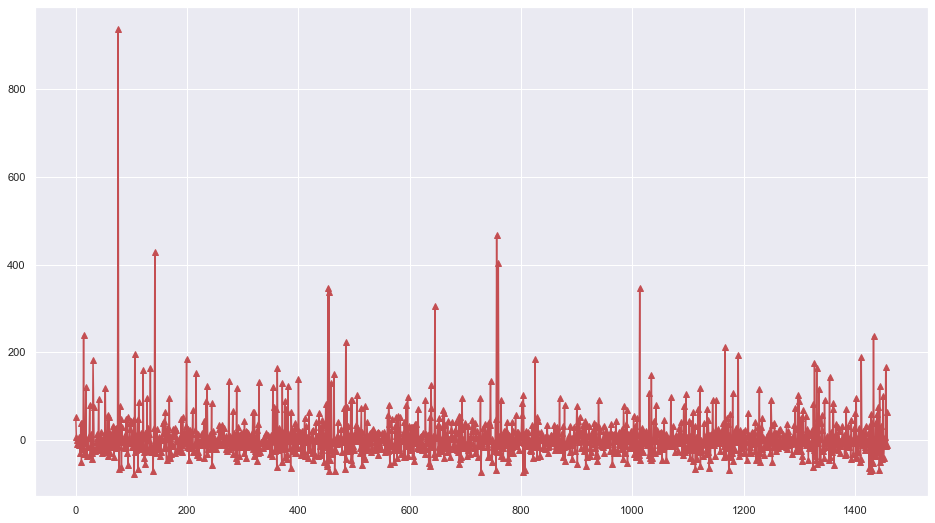

In [153]:
#Pranidhi
#plotting the error
plt.rcParams["figure.figsize"] = [16,9]
plt.plot(final.index, final['error%'], marker='^', color='r')
plt.show()

In [154]:
#Pranidhi
MAPE = np.mean(final['error']/final['SalePrice'].astype(float))
MAPE

0.06963829566663352

In [588]:
#Pranidhi
#Downloading error file for further analysis
bigerror = final[final['error%']>40]
bigerror.shape
bigerror.to_csv("bigerror.csv")

In [429]:
#Pranidhi
bigerror.to_csv("bigerror.csv")

In [ ]:
#Pranidhi
plt.figure(figsize=(18, 8))
sns.boxplot(x=final.error, y=final.SalePrice)